<img src="https://preview.redd.it/t81hzogamsq81.png?auto=webp&s=923a9389620840fce57cf207627d01a43078382d" width=500 px>

https://www.youtube.com/watch?v=2nR2e4J4ZaI

https://www.youtube.com/watch?v=GRtgLlwxpc4

YOLO v5 training on Custom Dataset

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sat Apr 16 21:07:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')



The dataset must be the following structure:

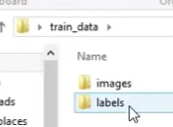

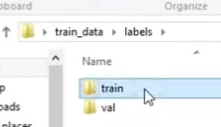

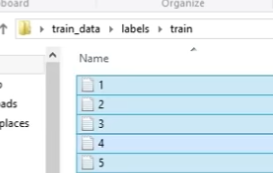

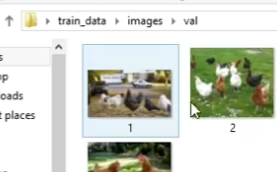



**Process the data**

*We need to create a separate txt file for each image that contains the details of all the bounding boxes on that image. This function will also move the training and val data into the directory structure that we created above. We won't need to do any image resizing for Yolo.*

# UNZIPPING THE DATASET


In [3]:
# !unzip -q "../input/military-classification/train"
# !unzip -q "../input/military-classification/valid"

# CLONING THE YOLO-V5 FILES FROM OFFICIAL REPOSITORY

In [4]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12847, done.
remote: Total 12847 (delta 0), reused 0 (delta 0), pack-reused 12847
Receiving objects: 100% (12847/12847), 11.76 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (8930/8930), done.


# INSTALLING THE DEPENDENCIES

In [5]:
!pip install -r ./yolov5/requirements.txt

# DOWNLOADING ALL VERSIONS OF YOLO-V5 MODEL

In [6]:
# !/content/yolov5/weights/download_weights.sh

# STEPS BEFORE TRAINING CUSTOM DATASET:
  1. Go to yolov5/data/
  2. Open **coco128.yaml**
  3. Edit the following inside it:
    

      1.   Training and Test file path
      2.   Number of classes and Class names.

  
  

In [3]:
tanks = list(sorted(['T-64BM "Bulat"', 'T-80BV', 'T-80BVM', 'T-80U', 'T-90', 'T-72B3', 'T-72B1', 'T-72AB', 'T-72BA', 'T-64BV']))
z = {key: value for key, value in enumerate(tanks)}
z


{0: 'T-64BM "Bulat"',
 1: 'T-64BV',
 2: 'T-72AB',
 3: 'T-72B1',
 4: 'T-72B3',
 5: 'T-72BA',
 6: 'T-80BV',
 7: 'T-80BVM',
 8: 'T-80U',
 9: 'T-90'}

In [8]:
f = open("./yolov5/data/coco128.yaml", "w")
text = """
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]

path: 
train: /kaggle/input/military-classification/v13_10tanks.yolov5pytorch
val: /kaggle/input/military-classification/v13_10tanks.yolov5pytorch
test:  ./test

# Classes
nc: 10  # number of classes
names: ['T-64BM "Bulat"', 'T-64BV', 'T-72AV', 'T-72B1', 'T-72B3', 'T-72BA', 'T-80BV', 'T-80BVM', 'T-80U', 'T-90']  # class names
"""
f.write(text)
f.close()

In [9]:
import wandb
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient() 
personal_key_for_api = user_secrets.get_secret("wandb_api")
!wandb login $personal_key_for_api
api = wandb.Api()

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# TRAINING THE YOLO-V5 MODEL

### From scracth

In [15]:
from datetime import datetime

datetime.now().strftime("%H:%M:%S %m/%d/%Y") + ".jpg"

'15:00:53 04/17/2022.jpg'

In [10]:
!python ./yolov5/train.py --data coco128.yaml --epochs 172 --weights '' --cfg yolov5x.yaml --img 640 --cache --noval --workers 0

wandb: Currently logged in as: r4bc1 (use `wandb login --relogin` to force relogin)
train: weights=, cfg=yolov5x.yaml, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=172, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=True, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-135-g7926afc torch 1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [ ]:
# !python ./yolov5/train.py --img 640 --batch 12 --epochs 2 --data coco128.yaml --weights yolov5x.pt --cache  --workers 0

## Заглушечка

In [11]:
import time
while 1:
    print(time.strftime("%H:%M:%S", time.localtime()))
    time.sleep(480)

07:05:13


KeyboardInterrupt: 

# VISUALIZING THE TRAINING METRICS

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir runs/train

# TESTING

In [ ]:
!python test.py --weights ./yolov5/runs/train/exp/weights/last.pt --data coco128.yaml --img 640

# DETECTING ON NEW IMAGES

In [ ]:
# %%bash
# export VERBOSE=False
# echo $VERBOSE
# python ./yolov5/detect.py

In [14]:
!python ./yolov5/detect.py --source "../input/military-classification/test_images/test_images" --weights ./yolov5/runs/train/exp/weights/best.pt --img 640

detect: weights=['./yolov5/runs/train/exp/weights/best.pt'], source=../input/military-classification/test_images/test_images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-135-g7926afc torch 1.9.1 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86233975 parameters, 0 gradients, 204.2 GFLOPs
image 1/43 /kaggle/input/military-classification/test_images/test_images/t64bm_1.png: 288x640 2 T-64BM "Bulat"s, Done. (0.028s)
image 2/43 /kaggle/input/military-classification/test_images/test_images/t64bm_2.jpg: 480x640 2 T-64BM "Bulat"s, Done. (0.039s)
image 3/43 /kaggle/input/military-classification/

In [ ]:
# %cp -r "./yolov5/runs/detect/exp" "../input/military-classification"

In [ ]:
%ls

# RETRAINING FROM THE LAST CHECKPOINT

In [ ]:
!python ./yolov5/train.py --weights ../input/military-classification/269_epochs_turrets_T80_T90.pt --epochs 30 --img 640

In [16]:
import pandas as pd
import numpy as np

In [17]:
beers = pd.read_csv("beerdata.csv")

In [18]:
beers

,name,style,ABV,IBU,rating,description
0,Abk Hell,Lager - Helles,5%,No,3.39,"This is a light, bright and very satisfying be..."
1,Adnams Ghost Ship,Pale Ale - English,4.5%,40,3.51,Adnams Ghost Ship has good bitterness with att...
2,Adnams Jack Brand Dry Hopped,Lager - Pale,4.2%,No,3.31,Brewed with Pilsner malt – like all decent lag...
3,Adnams Jack Brand Ease Up IPA,IPA - Session,4.6%,No,3.56,"Gold in colour, with big aromas of mango, flav..."
4,Adnams Jack Brand Innovation IPA,IPA - American,6.7%,No,3.46,The hops in Innovation are the stars of the sh...
...,...,...,...,...,...,...
346,Stary Melnik Iz Bochonka Myagkoe,Lager - Pale,4.3%,No,2.67,Пиво с легким освежающим вкусом с тонкими хмел...
347,Stary Melnik Iz Bochonka Svetloe,Lager - Pale,5%,No,2.69,Традиционное светлое пиво с насыщенным плотным...
348,Stary Melnik iz Bochonka Temnoye Barhatnoe,Lager - Munich Dunkel,4.2%,No,2.86,"Особенностью является специальная рецептура, о..."
349,Hmel & Friends Pale,Lager - Pale,4.8%,23,3.05,Новый бренд от «Балтики» – «Хмель & Friends». ...


In [21]:
{
    0: 'T-64BM "Bulat"',
    1: 'T-64BV',
    2: 'T-72AV',
    3: 'T-72B1',
    4: 'T-72B3',
    5: 'T-72BA',
    6: 'T-80BV',
    7: 'T-80BVM',
    8: 'T-80U',
    9: 'T-90'
}.values()

dict_values(['T-64BM "Bulat"', 'T-64BV', 'T-72AB', 'T-72B1', 'T-72B3', 'T-72BA', 'T-80BV', 'T-80BVM', 'T-80U', 'T-90'])

In [29]:
names_en = ['T-64BM "Bulat"', 'T-64BV', 'T-72AV', 'T-72B1', 'T-72B3', 'T-72BA', 'T-80BV', 'T-80BVM', 'T-80U', 'T-90']
names_ua = ['Т-64БМ "Булат"', 'Т-64БВ', 'Т-72АВ', 'Т-72Б1', 'Т-72Б3', 'Т-72БА', 'Т-80БВ', 'Т-80БВМ', 'Т-80У', 'Т-90']
types = ["Основний бойовий танк"] * 10

operators = ["🇺🇦", "🇺🇦"] + ["🇺🇦 / 🇷🇺"] * 2 + ["🇷🇺"] * 2 + ["🇺🇦 / 🇷🇺"] + ["🇷🇺"] * 3


info_links = [
    "https://cutt.ly/VFBUSIC",
    "https://cutt.ly/TFBUDYM",
    "https://cutt.ly/TFBIEnj",
    "https://cutt.ly/WFBIYW0",
    "https://cutt.ly/EFBIU3p",
    "https://cutt.ly/3FBIDPS",
    "https://cutt.ly/FFBO9AZ",
    "https://cutt.ly/RFBPelv",
    "https://cutt.ly/uFBPp60",
    "https://cutt.ly/PFBPxPQ"
    ]

In [30]:
vehicles_df = pd.DataFrame(
    data={
        "name_en": names_en,
        "name_ua": names_ua,
        "vehicle_type": types,
        "operator": operators,
        "info_link": info_links
    })

In [31]:
vehicles_df.to_csv("vehicles.csv")

In [37]:
hash(datetime.now().strftime("%H:%M:%S %m-%d-%Y"))

-8601878888768918235

In [38]:
type(datetime.now().strftime("%H:%M:%S %m-%d-%Y"))

str